In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
import tensorflow as tf
import keras
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Dropout,Bidirectional,LSTM,Embedding

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading dataset

In [2]:
df = pd.read_csv('/kaggle/input/medium-articles-dataset/medium_data.csv')

In [3]:
df.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [4]:
df.shape

(6508, 10)

In [5]:
df.isnull().sum()

id                 0
url                0
title              0
subtitle        3029
image            147
claps              0
responses          0
reading_time       0
publication        0
date               0
dtype: int64

In [6]:
data = df['title']

### Text Preprocessing

In [7]:
stopword_ = stopwords.words('english')

In [8]:
def preprocessing(text):
    
    preprocessed_text =[]
    for i in range(len(text)):
        title_text = re.sub("[^A-Za-z]"," ",text[i])
        title_text = title_text.lower().split()
        words = [x for x in title_text if not x in stopword_]
        sentence = ' '.join(words)
        preprocessed_text.append(sentence)
    return preprocessed_text

In [9]:
text = preprocessing(data)

In [10]:
max_len=[]
for i in range(len(text)):
    max_len.append(len(text[i]))
length = max(max_len)

### Tokenization

In [11]:
max_feature =2000
tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
final_text = pad_sequences(sequences,maxlen=length)

In [12]:
vocab_size = len(tokenizer.word_index)+1

In [13]:
sentence = final_text[:,:-1]
label = final_text[:,-1]
y_label = to_categorical(label, num_classes=vocab_size) 

### Model Architecture

In [14]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=100,input_length=length-1))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(vocab_size,activation='softmax'))

model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Model training

In [15]:
history = model.fit(sentence,y_label,epochs=50)

Epoch 1/50
204/204 [==============================] - 23s 71ms/step - loss: 7.5988 - accuracy: 0.0513
Epoch 2/50
204/204 [==============================] - 6s 32ms/step - loss: 6.7520 - accuracy: 0.0621
Epoch 3/50
204/204 [==============================] - 6s 27ms/step - loss: 6.5321 - accuracy: 0.0756
Epoch 4/50
204/204 [==============================] - 6s 31ms/step - loss: 6.3898 - accuracy: 0.0847
Epoch 5/50
204/204 [==============================] - 6s 28ms/step - loss: 6.2366 - accuracy: 0.0988
Epoch 6/50
204/204 [==============================] - 5s 25ms/step - loss: 6.0755 - accuracy: 0.1036
Epoch 7/50
204/204 [==============================] - 5s 26ms/step - loss: 5.9215 - accuracy: 0.1097
Epoch 8/50
204/204 [==============================] - 5s 27ms/step - loss: 5.7725 - accuracy: 0.1191
Epoch 9/50
204/204 [==============================] - 6s 28ms/step - loss: 5.6197 - accuracy: 0.1235
Epoch 10/50
204/204 [==============================] - 5s 27ms/step - loss: 5.4569 - accur

### Plotting graph

In [16]:
def plot_graph(string):
    plt.figure(figsize=(5,4))
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()

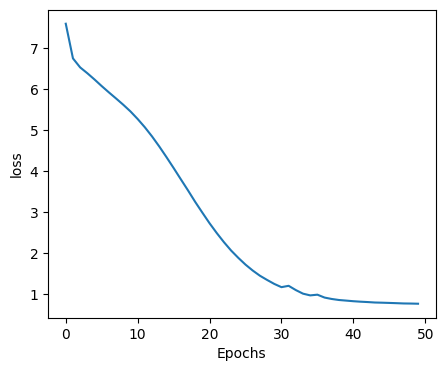

In [17]:
plot_graph('loss')

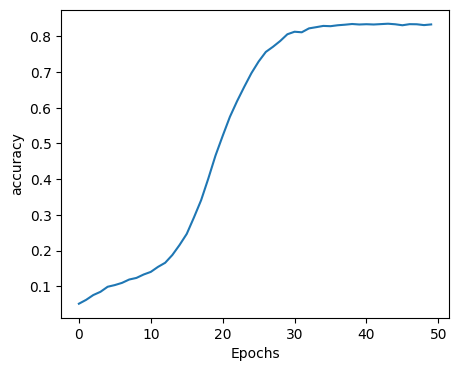

In [18]:
plot_graph('accuracy')

### Model Prediction

In [19]:
seed_text = "implementation of"
next_words = 2
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 24ms/step
implementation of lstm algorithms
